In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/processed/balanced_fights.csv')

sns.set_style(style="whitegrid")

Duration of fights (in seconds):
count    17024.000000
mean       635.215930
std        363.339772
min          5.000000
25%        280.000000
50%        812.000000
75%        900.000000
max       1500.000000
Name: total_time_seconds, dtype: float64


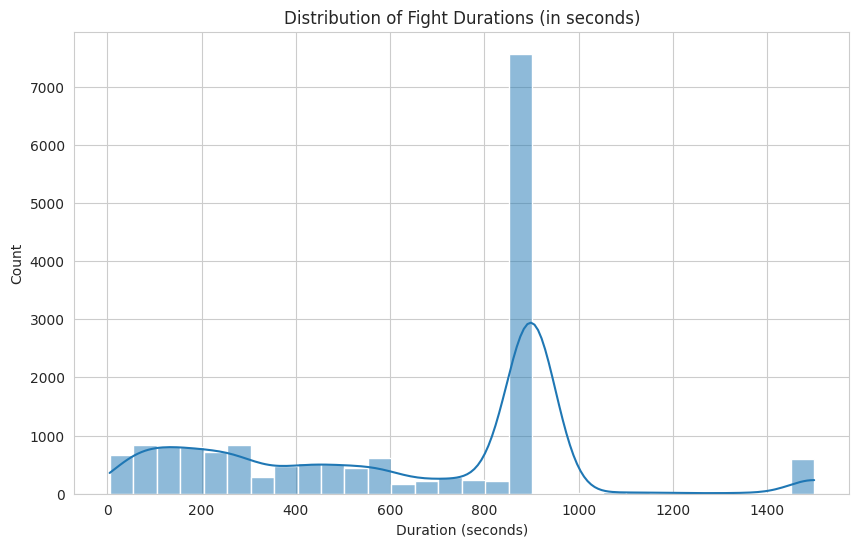

In [25]:
if 'total_time_seconds' in df.columns:
    print("Duration of fights (in seconds):")
    print(df['total_time_seconds'].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(df['total_time_seconds'], bins=30, kde=True)
    plt.title('Distribution of Fight Durations (in seconds)')
    plt.xlabel('Duration (seconds)')
    plt.show()
else:
    print("Column 'total_time_seconds' not found in the dataset.")

In [26]:
zero_strikes_fights = df[
    (df['f1_tot_str_attempted'] == 0) &
    (df['f2_tot_str_attempted'] == 0)
]

print(f"Number of fights with zero strikes attempted: {len(zero_strikes_fights)}")
if len(zero_strikes_fights) > 0:
    print("\nExample of a fight with zero strikes attempted:")
    cols_to_show = ['event_date', 'f1_name', 'f2_name', 'method_detail', 'f1_tot_str_attempted']
    display(zero_strikes_fights[cols_to_show].head())

Number of fights with zero strikes attempted: 6

Example of a fight with zero strikes attempted:


,event_date,f1_name,f2_name,method_detail,f1_tot_str_attempted
2324,1994-03-11,Royce Gracie,Jason DeLucia,Armbar From Mount,0
2514,1994-03-11,Royce Gracie,Remco Pardoel,Gi Choke From Back Control,0
6684,1995-07-14,Oleg Taktarov,Anthony Macias,Guillotine Choke After Drop to Ground,0
8695,1994-03-11,Royce Gracie,Jason DeLucia,Armbar From Mount,0
8897,1995-07-14,Oleg Taktarov,Anthony Macias,Guillotine Choke After Drop to Ground,0


Methods distribution (Top 10 %):
method_detail
Punch to Head At Distance            8.722446
Rear Naked Choke                     7.383266
Punches to Head At Distance          4.349372
Punches to Head On Ground            3.010192
Punch to Head In Clinch              1.528798
Kick to Head At Distance             1.362882
Punches to Head From Mount           1.351031
Punches to Head From Back Control    1.196966
Guillotine Choke On Ground           0.805878
Triangle Choke From Bottom Guard     0.782176
Name: proportion, dtype: float64


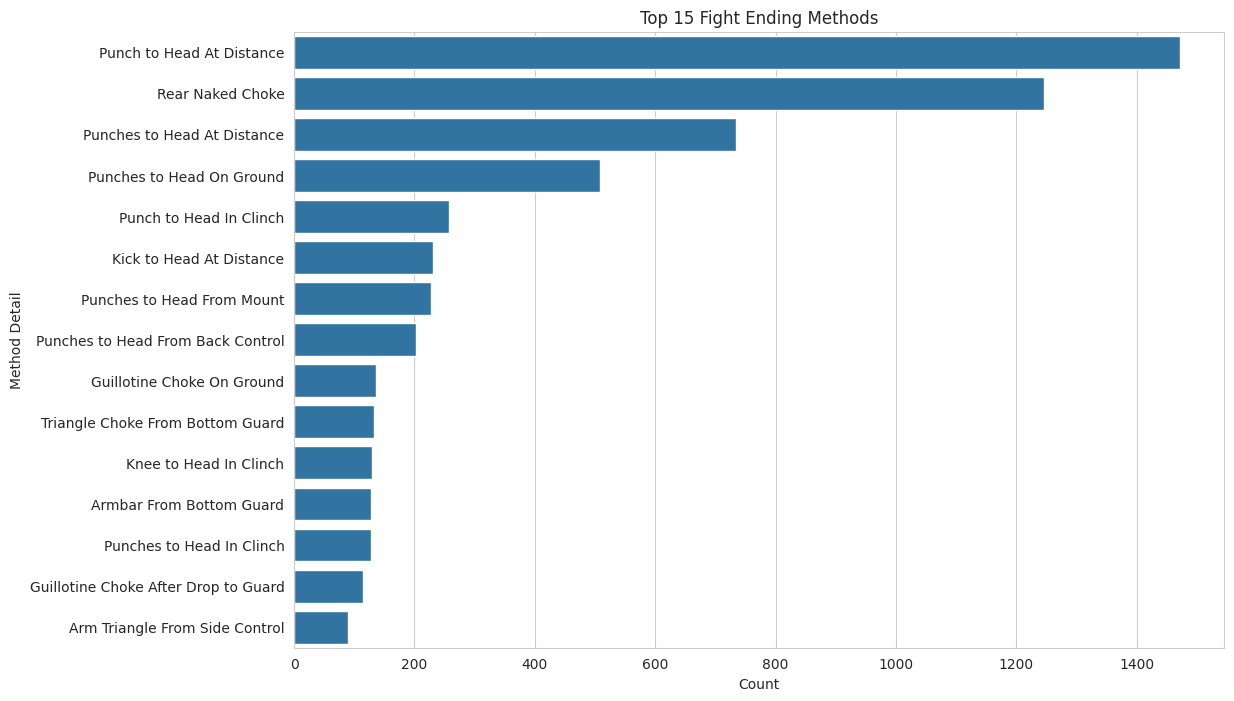

In [27]:
if 'method_detail' in df.columns:
    method_counts = df['method_detail'].value_counts(normalize=True) * 100
    print("Methods distribution (Top 10 %):")
    print(method_counts.head(10))

    plt.figure(figsize=(12, 8))
    
    top_methods = df['method_detail'].value_counts().iloc[:15].index
    
    sns.countplot(y='method_detail', data=df, order=top_methods)
    plt.title('Top 15 Fight Ending Methods')
    plt.xlabel('Count')
    plt.ylabel('Method Detail')
    plt.show()
else:
    print("Column 'method_detail' not found.")

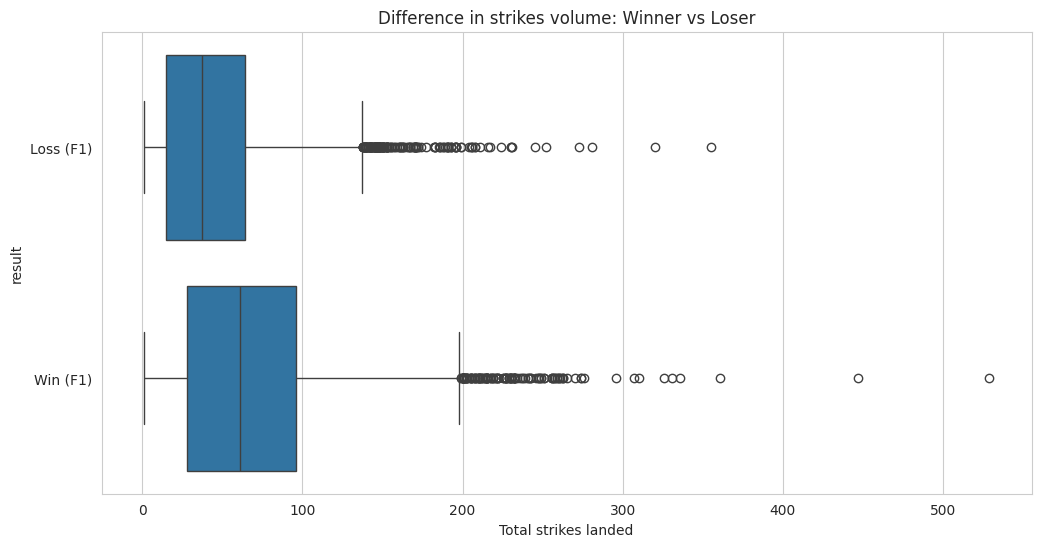

In [28]:
df_filtered = df[df['f1_tot_str_landed'] > 0].copy()

df_filtered['result'] = df_filtered['target'].map({1: 'Win (F1)', 0: 'Loss (F1)'})

plt.figure(figsize=(12, 6))

sns.boxplot(x='f1_tot_str_landed', y='result', data=df_filtered, orient='h')

plt.title('Difference in strikes volume: Winner vs Loser')
plt.xlabel('Total strikes landed')
plt.show()

In [29]:
discovery_columns = ['f1_name', 'f2_name', 'target', 'method_detail']
display(df[discovery_columns].sample(10))

,f1_name,f2_name,target,method_detail
4028,Tom Lawlor,CB Dollaway,1,Guillotine Choke After Drop to Guard Technical...
16601,Sumudaerji,Mitch Raposo,0,Junichiro Kamijo 29 - 28. Christopher Edgehill...
10456,Rob Font,Adrian Yanez,0,Punch to Head At Distance
16765,John Howard,Chris Wilson,1,Cecil Peoples 29 - 28. Patricia Morse-Jarman 2...
7789,Josh Emmett,Michael Johnson,0,Punch to Head At Distance
14449,Dong Hyun Kim,Jason Tan,0,Elbows to Head From Side Control
879,Cat Zingano,Julianna Pena,1,Glenn Trowbridge 28 - 29. Chris Lee 28 - 29. M...
3523,Davey Grant,Louis Smolka,0,Punches to Head On Ground
16009,Sara McMann,Karol Rosa,1,Mike Bell 28 - 29. Andrew Adkins 28 - 29. Eric...
7231,Vitor Belfort,Wanderlei Silva,1,Punches to Head At Distance


In [30]:
df['diff_age'] = df['f1_age'] - df['f2_age']
df['diff_height'] = df['f1_height'] - df['f2_height']
df['diff_reach'] = df['f1_reach'] - df['f2_reach']

display(df.sample(10))

,f2_tot_str_attempted,f1_td_landed,f1_reach,f1_ctrl,weight_class,f2_link,f1_weight,f2_td_attempted,f1_rev,f1_sig_pct,...,f1_height,f1_age,f1_tot_str_landed,event_date,f1_stance,f2_rev,f2_stance,diff_age,diff_height,diff_reach
6036,3,1,193.04,218,Welterweight,http://ufcstats.com/fighter-details/d2d37e8eeb...,83.914520,1,0,0.78,...,180.34,24.254620,37,2005-08-20,Orthodox,0,Southpaw,-9.032170,5.08,12.70
10338,204,5,177.80,475,Middleweight,http://ufcstats.com/fighter-details/6e92eb1242...,83.914520,0,0,0.52,...,182.88,38.036961,115,2015-11-14,Southpaw,0,Southpaw,13.133470,-10.16,NaN
13191,114,0,NaN,0,Heavyweight,http://ufcstats.com/fighter-details/6859f67468...,92.986360,6,0,0.62,...,185.42,34.195756,181,1999-05-07,Orthodox,0,Orthodox,6.455852,7.62,NaN
1840,86,2,170.18,87,Bantamweight,http://ufcstats.com/fighter-details/78114b7199...,61.234920,3,0,0.50,...,170.18,26.836413,62,2019-12-14,Switch,0,Orthodox,-13.749487,2.54,0.00
8124,92,1,180.34,82,Lightweight,http://ufcstats.com/fighter-details/7abe471b61...,70.306760,11,0,0.36,...,175.26,29.273101,57,2012-07-07,Orthodox,1,Orthodox,-4.265572,-2.54,0.00
11536,147,0,203.20,24,Heavyweight,http://ufcstats.com/fighter-details/e13abac808...,120.201880,0,0,0.48,...,193.04,29.026694,141,2021-05-22,Orthodox,0,Southpaw,1.587953,10.16,15.24
15561,99,0,187.96,264,Welterweight,http://ufcstats.com/fighter-details/c6aee362c7...,77.110640,1,1,0.43,...,187.96,25.785079,57,2017-11-04,Switch,0,Orthodox,-1.541410,-2.54,-10.16
8822,78,2,203.20,172,Welterweight,http://ufcstats.com/fighter-details/ed74afc8b5...,77.110640,1,0,0.44,...,190.50,27.227926,114,2014-10-25,Orthodox,0,Orthodox,3.909651,10.16,12.70
14876,182,0,180.34,317,Lightweight,http://ufcstats.com/fighter-details/cfc3e7bb44...,65.770840,4,0,0.65,...,175.26,26.872005,124,2022-04-16,Southpaw,1,Orthodox,-5.546886,-5.08,-2.54
272,7,0,185.42,8,Heavyweight,http://ufcstats.com/fighter-details/6a311920ed...,107.047712,0,0,0.52,...,185.42,27.989049,11,2025-11-08,Orthodox,0,Orthodox,-4.580424,-2.54,-5.08


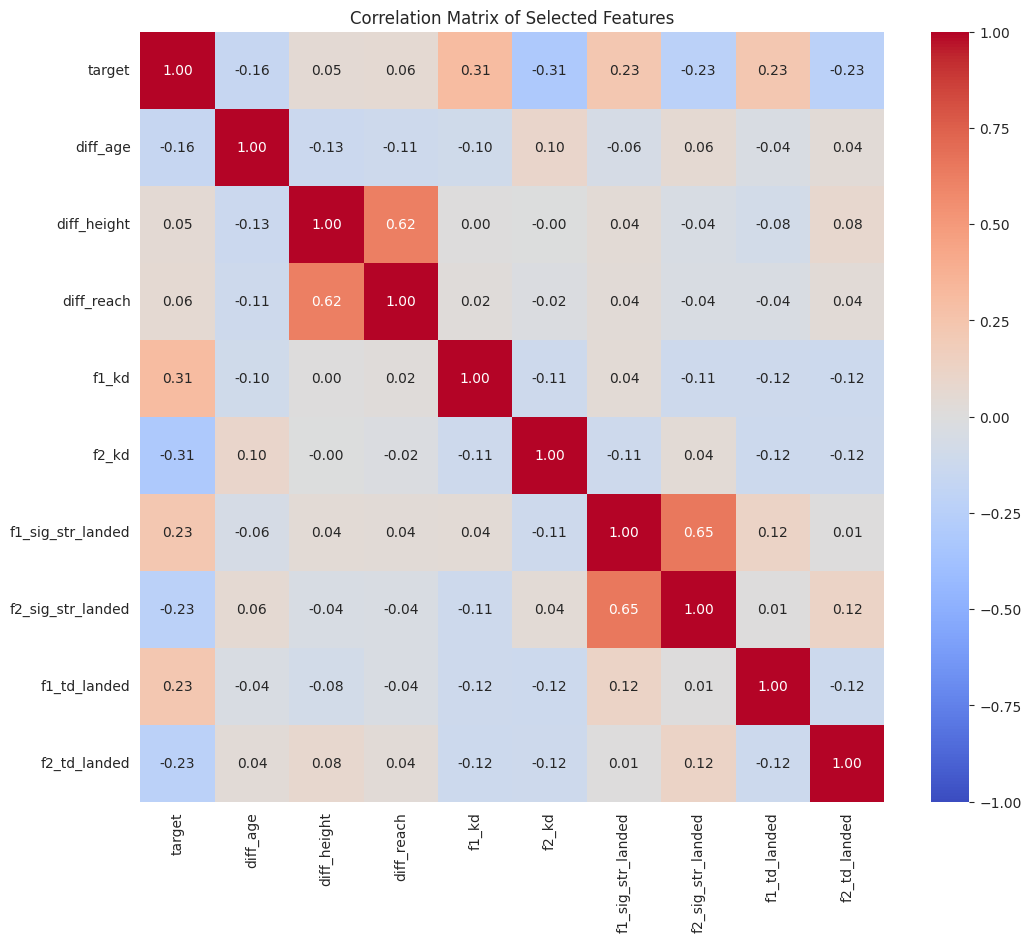

In [31]:
selected_columns = [
    'target',
    'diff_age', 'diff_height', 'diff_reach',
    'f1_kd', 'f2_kd',
    'f1_sig_str_landed', 'f2_sig_str_landed',
    'f1_td_landed', 'f2_td_landed',
]

corr_matrix = df[selected_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features')
plt.show()

1. Knockdown Power (`f1_kd`):
    - There is a strong positive correlation between scoring a knockdown (`f1_kd`) and winning the fight.
    - This confirms that knockdowns are decisive events, often leading to a knockout or securing the round on points.
    - The inverse is also true: suffering a knockdown (`f2_kd`) strongly correlates with losing.

2. Strike Volume (`f1_sig_str_landed`):
    - Significant strikes landed show a positive correlation with victory.
    - Fighters who land more significant strikes tend to control the fight and score more points with judges.

3. Ground Control (`f1_td_landed`):
    - Successful takedowns show a positive correlation, indicating that taking the fight to the ground is a valid path to victory.

4. Physical Attributes (`diff_...`):
    - Differences in reach, height, and age show a weak correlation with the result.
    - This suggests that technical performance inside the cage (striking, grappling) is far more relevant than raw physical stats.

**Conclusion:**
The model should prioritize fight performance metrics (`kd`, `sig_str`, `td`) as the primary features, using physical attributes (`age`, `height`, `reach`) as secondary adjustment factors.

In [32]:
text_columns = df.select_dtypes(include=['object', 'str']).columns

print("Text columns in the dataset:", text_columns.tolist())

columns_to_encoding = ['weight_class', 'f1_stance', 'f2_stance']
df = pd.get_dummies(df, columns=columns_to_encoding, drop_first=True)

print("\nColumns after encoding:")
print([c for c in df.columns if 'weight_class' in c])

print(f"Total columns after encoding: {len(df.columns)}")

Text columns in the dataset: ['weight_class', 'f2_link', 'referee', 'method_detail', 'f1_name', 'f1_link', 'f2_name', 'event_date', 'f1_stance', 'f2_stance']

Columns after encoding:
['weight_class_Catch Weight', 'weight_class_Featherweight', 'weight_class_Flyweight', 'weight_class_Heavyweight', 'weight_class_Light Heavyweight', 'weight_class_Lightweight', 'weight_class_Middleweight', 'weight_class_Open Weight', 'weight_class_Super Heavyweight', 'weight_class_Welterweight', "weight_class_Women's Bantamweight", "weight_class_Women's Featherweight", "weight_class_Women's Flyweight", "weight_class_Women's Strawweight"]
Total columns after encoding: 66


In [33]:
new_df = df.drop(columns=['f1_name', 'f2_name', 'referee', 'event_date', 'f1_link', 'f2_link', 'f1_tot_str_landed', 'f2_tot_str_landed', 'method_detail'])

In [34]:
from sklearn.model_selection import train_test_split

x = new_df.drop(columns=['target'])
y = new_df['target']

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
)

print(f"Original size: { len(new_df)} fights")
print(f"\nTraining: {x_train.shape[0]} fights (for model study)")
print(f"Testing: {x_test.shape[0]} fights (for final evaluation)")
print(f"\nTest proportion: {x_test.shape[0] / len(new_df):.0%}")

Original size: 17024 fights

Training: 13619 fights (for model study)
Testing: 3405 fights (for final evaluation)

Test proportion: 20%


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000, random_state=42)
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

x_train_clean = imputer.fit_transform(x_train)
x_test_clean = imputer.transform(x_test)

x_train_scaled = scaler.fit_transform(x_train_clean)
x_test_scaled = scaler.transform(x_test_clean)

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel accuracy on test set: {accuracy:.2%}")
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Model accuracy on test set: 88.19%

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1702
           1       0.88      0.89      0.88      1703

    accuracy                           0.88      3405
   macro avg       0.88      0.88      0.88      3405
weighted avg       0.88      0.88      0.88      3405



In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators = 100,
    random_state = 42
)

rf_model.fit(x_train_scaled, y_train)
y_rf_pred = rf_model.predict(x_test_scaled)

rf_accuracy = accuracy_score(y_test, y_rf_pred)
print(f"\nRandom Forest Model accuracy on test set: {rf_accuracy:.2%}")
print("\nRandom Forest Classification report:")
print(classification_report(y_test, y_rf_pred))


Random Forest Model accuracy on test set: 87.78%

Random Forest Classification report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1702
           1       0.87      0.89      0.88      1703

    accuracy                           0.88      3405
   macro avg       0.88      0.88      0.88      3405
weighted avg       0.88      0.88      0.88      3405



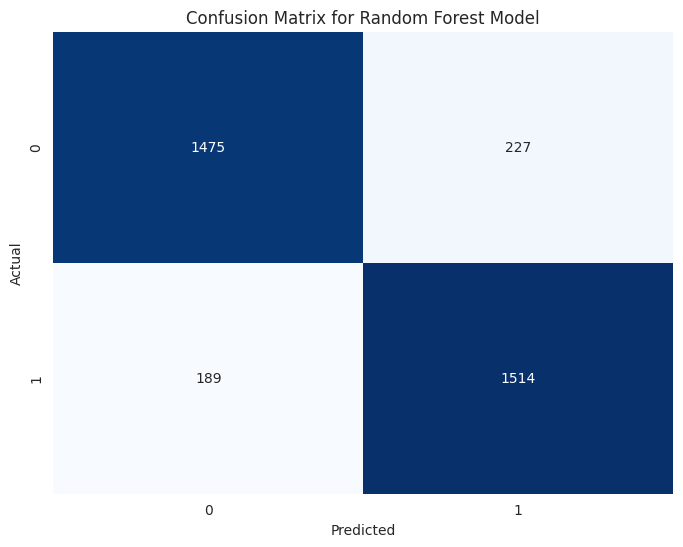

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    data = matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
)

plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

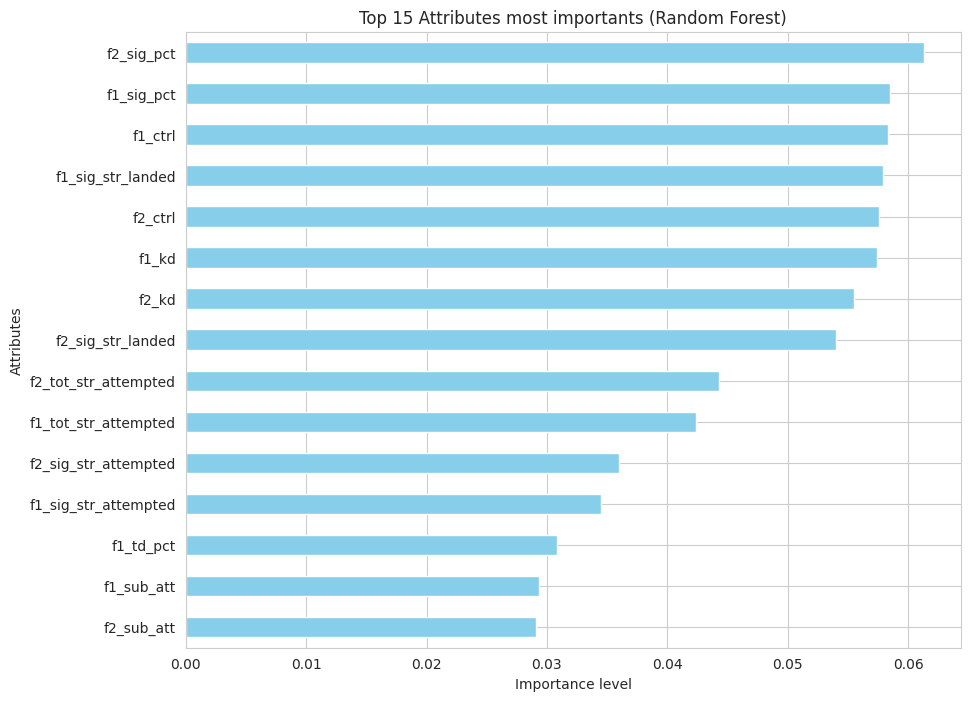

In [38]:
importances = rf_model.feature_importances_
columns_name = x.columns

s_importances = pd.Series(importances, index=columns_name).sort_values(ascending=False).head(15)
s_importances = s_importances.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
s_importances.plot(kind='barh', color='skyblue')
plt.title('Top 15 Attributes most importants (Random Forest)')
plt.xlabel('Importance level')
plt.ylabel('Attributes')
plt.show()

In [39]:
fights_columns = [
    'f1_kd', 'f2_kd', 
    'f1_sig_str_landed', 'f2_sig_str_landed',
    'f1_sig_str_attempted', 'f2_sig_str_attempted',
    'f1_sig_pct', 'f2_sig_pct',
    'f1_tot_str_landed', 'f2_tot_str_landed',
    'f1_tot_str_attempted', 'f2_tot_str_attempted',
    'f1_td_landed', 'f2_td_landed',
    'f1_td_attempted', 'f2_td_attempted',
    'f1_td_pct', 'f2_td_pct',
    'f1_sub_att', 'f2_sub_att',
    'f1_rev', 'f2_rev',
    'f1_ctrl', 'f2_ctrl',
    'total_time_seconds'
]

strict_x = x.drop(columns=fights_columns, errors='ignore')

strict_x_train, strict_x_test, strict_y_train, strict_y_test = train_test_split(
    strict_x, y, test_size=0.2, random_state=42
)

imputer = SimpleImputer(strategy='mean')
strict_x_train_clean = imputer.fit_transform(strict_x_train)
stricti_x_test_clean = imputer.transform(strict_x_test)

print("Training the model with only pre-fight attributes...")
strict_rf_moddel = RandomForestClassifier(n_estimators=100, random_state=42)
strict_rf_moddel.fit(strict_x_train_clean, strict_y_train)

strict_y_pred = strict_rf_moddel.predict(stricti_x_test_clean)
strict_accuracy = accuracy_score(strict_y_test, strict_y_pred)

print(f"\nStrict Random Forest Model accuracy on test set: {strict_accuracy:.2%}")
print("\nStrict Random Forest Classification report:")
print(classification_report(strict_y_test, strict_y_pred))

Training the model with only pre-fight attributes...

Strict Random Forest Model accuracy on test set: 58.88%

Strict Random Forest Classification report:
              precision    recall  f1-score   support

           0       0.59      0.60      0.59      1702
           1       0.59      0.58      0.59      1703

    accuracy                           0.59      3405
   macro avg       0.59      0.59      0.59      3405
weighted avg       0.59      0.59      0.59      3405



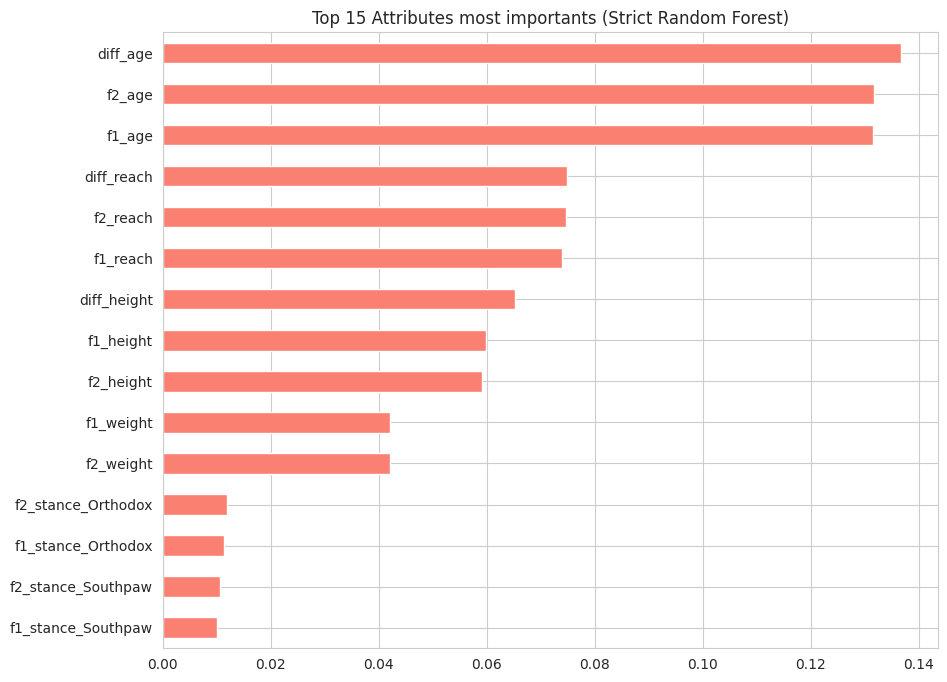

In [40]:
strict_importances = strict_rf_moddel.feature_importances_
strict_columns_name = strict_x.columns

s_strict_importances = pd.Series(strict_importances, index=strict_columns_name).sort_values(ascending=False).head(15)
s_strict_importances = s_strict_importances.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
s_strict_importances.plot(kind='barh', color='salmon')
plt.title('Top 15 Attributes most importants (Strict Random Forest)')
plt.show()

In [42]:
df['event_date'] = pd.to_datetime(df['event_date'])
df = df.sort_values(by='event_date', ascending=True)

df.reset_index(drop=True, inplace=True)

print("Top 5 fights:")
print(df[['event_date', 'f1_name', 'f2_name']].head(5))

print("\nLast 5 fights:")
print(df[['event_date', 'f1_name', 'f2_name']].tail(5))

Top 5 fights:
  event_date        f1_name             f2_name
0 1994-03-11  Jason DeLucia         Scott Baker
1 1994-03-11   Royce Gracie       Patrick Smith
2 1994-03-11  Patrick Smith       Johnny Rhodes
3 1994-03-11  Remco Pardoel  Alberta Cerra Leon
4 1994-03-11   Orlando Wiet    Robert Lucarelli

Last 5 fights:
      event_date               f1_name               f2_name
17019 2026-02-07        Klaudia Sygula    Priscila Cachoeira
17020 2026-02-07        Mario Bautista     Vinicius Oliveira
17021 2026-02-07          Bruna Brasil          Ketlen Souza
17022 2026-02-07   Michal Oleksiejczuk  Marc-Andre Barriault
17023 2026-02-07  Nikolay Veretennikov            Niko Price


In [49]:
f1_statistics = ['f1_kd', 'f1_sig_str_landed', 'f1_td_landed', 'f1_ctrl', 'f1_sig_pct']
f2_statistics = ['f2_kd', 'f2_sig_str_landed', 'f2_td_landed', 'f2_ctrl', 'f2_sig_pct']

for col in f1_statistics:
    new_col = col + '_hist_avg'
    df[new_col] = df.groupby('f1_name')[col].transform(lambda x: x.shift(1).expanding().mean())

for col in f2_statistics:
    new_col = col + '_hist_avg'
    df[new_col] = df.groupby('f2_name')[col].transform(lambda x: x.shift(1).expanding().mean())

historical_columns = [c + '_hist_avg' for c in f1_statistics + f2_statistics]
df[historical_columns] = df[historical_columns].fillna(0)

fighter_test = "Alex Pereira"

historical_vision = df[df['f1_name'] == fighter_test][
    ['event_date', 'f1_name', 'f1_sig_str_landed', 'f1_sig_str_landed_hist_avg']
]

print(f"Historical vision for {fighter_test}:")
print(historical_vision.head(30))

Historical vision for Alex Pereira:
      event_date       f1_name  f1_sig_str_landed  f1_sig_str_landed_hist_avg
12672 2021-11-06  Alex Pereira                  3                    0.000000
12678 2021-11-06  Alex Pereira                 11                    3.000000
12980 2022-03-12  Alex Pereira                 59                    7.000000
12991 2022-03-12  Alex Pereira                108                   24.333333
14083 2023-04-08  Alex Pereira                 41                   45.250000
14100 2023-04-08  Alex Pereira                 49                   44.400000
15173 2024-04-13  Alex Pereira                 24                   45.166667
15189 2024-04-13  Alex Pereira                 12                   42.142857
15412 2024-06-29  Alex Pereira                  7                   38.375000
15414 2024-06-29  Alex Pereira                 38                   34.888889
15661 2024-10-05  Alex Pereira                 61                   35.200000
15680 2024-10-05  Alex Perei

In [ ]:
spoilers = [
    'f1_kd', 'f2_kd', 'f1_sig_str_landed', 'f2_sig_str_landed',
    'f1_sig_str_attempted', 'f2_sig_str_attempted', 'f1_sig_pct', 'f2_sig_pct',
    'f1_tot_str_landed', 'f2_tot_str_landed', 'f1_tot_str_attempted', 'f2_tot_str_attempted',
    'f1_td_landed', 'f2_td_landed', 'f1_td_attempted', 'f2_td_attempted',
    'f1_td_pct', 'f2_td_pct', 'f1_sub_att', 'f2_sub_att',
    'f1_rev', 'f2_rev', 'f1_ctrl', 'f2_ctrl', 'total_time_seconds', 'method_detail',
    'f1_age', 'f2_age'
]

df_model = df.drop(columns=spoilers, errors='ignore')
text_columns = ['f1_name', 'f2_name', 'f1_link', 'f2_link', 'event_date', 'referee']
df_model = df_model.drop(columns=text_columns, errors='ignore')

x_final = df_model.drop('target', axis=1)
y_final = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_clean = imputer.fit_transform(X_train)
X_test_clean = imputer.transform(X_test)

print("Training the final model with historical averages...")
final_rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
final_rf.fit(X_train_clean, y_train)

y_pred = final_rf.predict(X_test_clean)
acc = accuracy_score(y_test, y_pred)

print(f"\nFinal Random Forest Model accuracy on test set: {acc:.2%}")
print("\nFinal Random Forest Classification report:")
print(classification_report(y_test, y_pred))

Training the final model with historical averages...

Final Random Forest Model accuracy on test set: 62.94%

Final Random Forest Classification report:
              precision    recall  f1-score   support

           0       0.62      0.63      0.62      1654
           1       0.64      0.63      0.64      1751

    accuracy                           0.63      3405
   macro avg       0.63      0.63      0.63      3405
weighted avg       0.63      0.63      0.63      3405



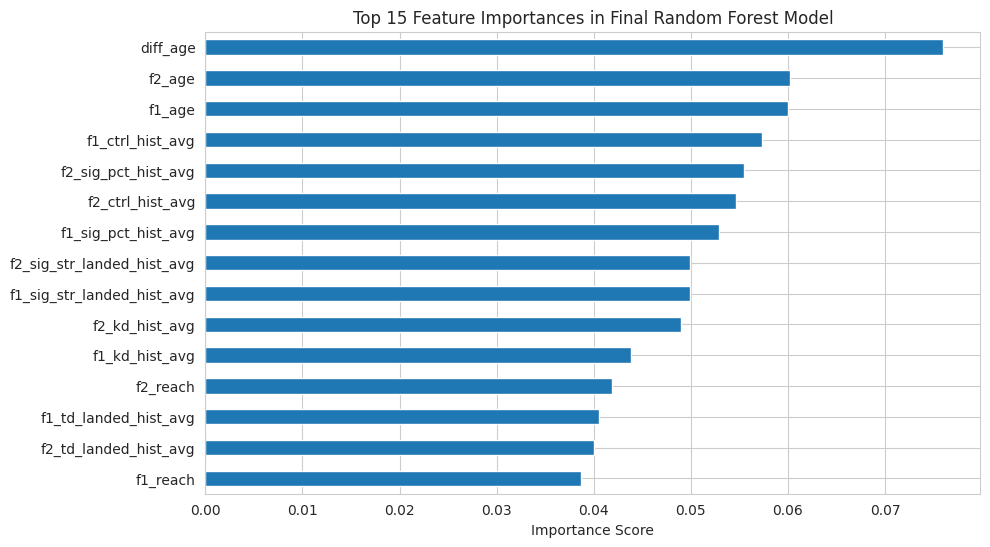

In [58]:
importances = final_rf.feature_importances_
cols = X_train.columns

s_importances = pd.Series(importances, index=cols).sort_values(ascending=True).tail(15)

plt.figure(figsize=(10, 6))
s_importances.plot(kind='barh')
plt.title('Top 15 Feature Importances in Final Random Forest Model')
plt.xlabel('Importance Score')
plt.show()

In [59]:
import joblib
import os

os.makedirs('../models', exist_ok=True)
model_path = '../models/ufc_random_forest.pkl'
joblib.dump(final_rf, model_path)
print(f"Model saved to {model_path}")

imputer_path = '../models/ufc_imputer.pkl'
joblib.dump(imputer, imputer_path)
print(f"Imputer saved to {imputer_path}")

columns_path = '../models/ufc_model_columns.pkl'
joblib.dump(X_train.columns.tolist(), columns_path)
print(f"Model columns saved to {columns_path}")

Model saved to ../models/ufc_random_forest.pkl
Imputer saved to ../models/ufc_imputer.pkl
Model columns saved to ../models/ufc_model_columns.pkl
